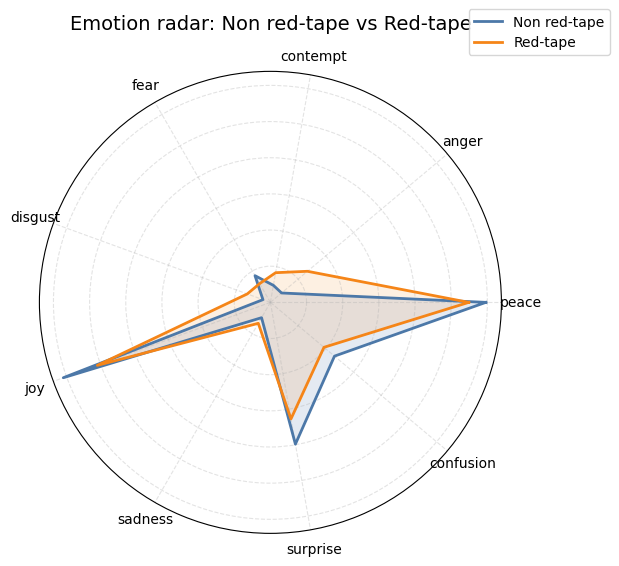

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

history_path = Path("data/sim_history/20260121T133956Z_llm.json")

with history_path.open(encoding="utf-8") as f:
    saved = json.load(f)

results = saved["results"]
# Expecting first = non red-tape, second = red-tape
base_stats = results[0]["stats"]["means"]
red_stats = results[1]["stats"]["means"]

EMOTION_BASE_ORDER = [
    "peace","anger","contempt","fear","disgust",
    "joy","sadness","surprise","confusion","frustration",
]

def emotion_order(keys):
    order, seen = [], set()
    for emo in EMOTION_BASE_ORDER:
        if emo in keys and emo not in seen:
            order.append(emo); seen.add(emo)
    for emo in sorted(keys):
        if emo not in seen:
            order.append(emo)
    return order

keys = set(base_stats) | set(red_stats)
order = emotion_order(keys)
theta = np.linspace(0, 2*np.pi, len(order), endpoint=False)

base_vals = [base_stats.get(e, 0) for e in order]
red_vals = [red_stats.get(e, 0) for e in order]

angles = np.concatenate([theta, theta[:1]])
base_closed = np.concatenate([base_vals, base_vals[:1]])
red_closed = np.concatenate([red_vals, red_vals[:1]])

fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(6,6))
ax.plot(angles, base_closed, linewidth=2, color="#4c78a8", label="Non red-tape")
ax.fill(angles, base_closed, alpha=0.15, color="#4c78a8")
ax.plot(angles, red_closed, linewidth=2, color="#f58518", label="Red-tape")
ax.fill(angles, red_closed, alpha=0.12, color="#f58518")

ax.set_xticks(theta)
ax.set_xticklabels(order, fontsize=10)
ax.set_yticklabels([])
ax.set_title("Emotion radar: Non red-tape vs Red-tape", fontsize=14, pad=14)
ax.grid(True, linestyle="--", alpha=0.35)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.15))
plt.show()


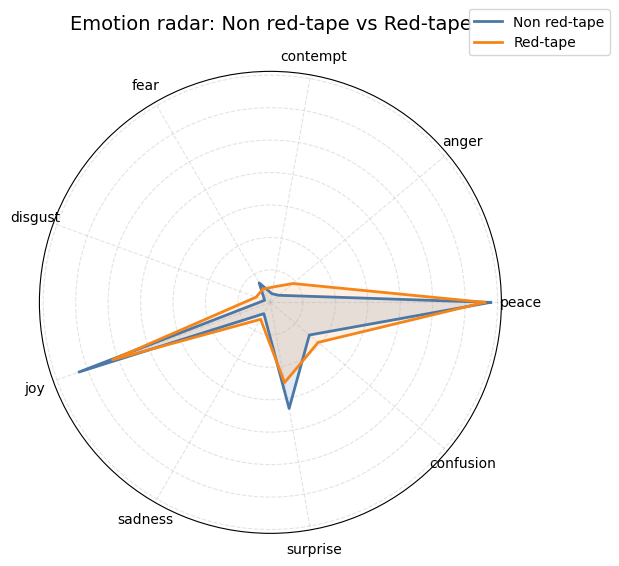

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

history_path = Path("data/sim_history/20260121T132934Z_llm.json")

with history_path.open(encoding="utf-8") as f:
    saved = json.load(f)

results = saved["results"]
# Expecting first = non red-tape, second = red-tape
base_stats = results[0]["stats"]["means"]
red_stats = results[1]["stats"]["means"]

EMOTION_BASE_ORDER = [
    "peace","anger","contempt","fear","disgust",
    "joy","sadness","surprise","confusion","frustration",
]

def emotion_order(keys):
    order, seen = [], set()
    for emo in EMOTION_BASE_ORDER:
        if emo in keys and emo not in seen:
            order.append(emo); seen.add(emo)
    for emo in sorted(keys):
        if emo not in seen:
            order.append(emo)
    return order

keys = set(base_stats) | set(red_stats)
order = emotion_order(keys)
theta = np.linspace(0, 2*np.pi, len(order), endpoint=False)

base_vals = [base_stats.get(e, 0) for e in order]
red_vals = [red_stats.get(e, 0) for e in order]

angles = np.concatenate([theta, theta[:1]])
base_closed = np.concatenate([base_vals, base_vals[:1]])
red_closed = np.concatenate([red_vals, red_vals[:1]])

fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(6,6))
ax.plot(angles, base_closed, linewidth=2, color="#4c78a8", label="Non red-tape")
ax.fill(angles, base_closed, alpha=0.15, color="#4c78a8")
ax.plot(angles, red_closed, linewidth=2, color="#f58518", label="Red-tape")
ax.fill(angles, red_closed, alpha=0.12, color="#f58518")

ax.set_xticks(theta)
ax.set_xticklabels(order, fontsize=10)
ax.set_yticklabels([])
ax.set_title("Emotion radar: Non red-tape vs Red-tape", fontsize=14, pad=14)
ax.grid(True, linestyle="--", alpha=0.35)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.15))
plt.show()
